ЗавданняЖ Потрібно побудувати моделі SVM, Random Forest та інші. Вибрати найкращу. Зробити висновки. Визначити оптимальну кількість класетрів методом ліктя та методом силуетів. Візалізувати кластери методом середніх або будь-яким зручним методом.

Файл з даними завантажити з Kaggle за посиланням: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset?resource=download


In [13]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
PATH = "../../data/students_performance"
fname = os.path.join(PATH, 'Student_performance_data _.csv')
df = pd.read_csv(fname)
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [7]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [5]:
corr_matrix = df.corr()
corr_matrix

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


In [6]:
df['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

In [9]:
# Separate features and target variable
X = df.drop(['StudentID', 'GradeClass'], axis=1)
y = df['GradeClass']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save indexes of test set before scaling
test_indexes = X_test.index

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Build SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [11]:
print("SVM Classification Report: \n", classification_report(y_test, y_pred_svm))


SVM Classification Report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.58      0.80      0.67        49
         2.0       0.80      0.71      0.75        85
         3.0       0.76      0.79      0.77        86
         4.0       0.92      0.96      0.94       237

    accuracy                           0.82       479
   macro avg       0.61      0.65      0.63       479
weighted avg       0.79      0.82      0.80       479



/home/serhii/Documents/DataScience/DSLectures/DataScience_sandbox/.ds_lec_env/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/serhii/Documents/DataScience/DSLectures/DataScience_sandbox/.ds_lec_env/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/serhii/Documents/DataScience/DSLectures/DataScience_sandbox/.ds_lec_env/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab

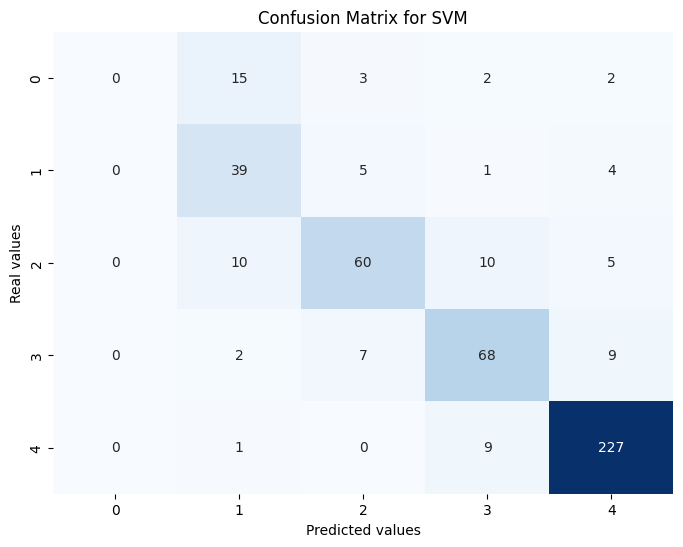

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted values")
plt.ylabel('Real values')
plt.show()

In [15]:
# Build Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [16]:
print("Random forset Classification Report: \n", classification_report(y_test, y_pred_rf))

Random forset Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.41      0.55        22
         1.0       0.80      0.88      0.83        49
         2.0       0.94      0.87      0.90        85
         3.0       0.89      0.90      0.89        86
         4.0       0.94      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.88      0.81      0.83       479
weighted avg       0.91      0.91      0.91       479



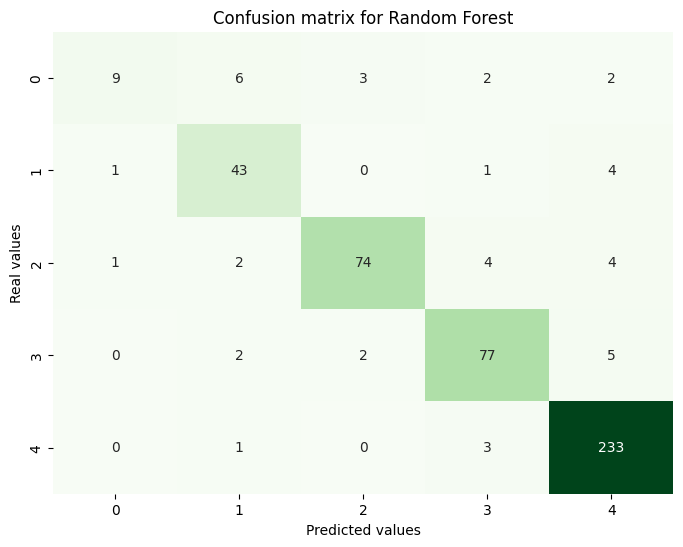

In [17]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Visualisation using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion matrix for Random Forest")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.show()


In [18]:
from sklearn.linear_model import LogisticRegression

# Create and teach model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg_model.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.43      0.47      0.45        49
         2.0       0.60      0.62      0.61        85
         3.0       0.71      0.57      0.63        86
         4.0       0.88      0.98      0.93       237

    accuracy                           0.75       479
   macro avg       0.53      0.53      0.52       479
weighted avg       0.71      0.75      0.73       479

Logistic Regression Confusion Matrix: 
 [[  0  15   3   2   2]
 [  4  23  17   1   4]
 [  1  12  53  14   5]
 [  0   2  14  49  21]
 [  0   1   1   3 232]]


In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and teach model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation of the model
print("Gradient Boosting Classification Report: \n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix: \n", confusion_matrix(y_test, y_pred_gb))



Gradient Boosting Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.59      0.70        22
         1.0       0.77      0.88      0.82        49
         2.0       0.94      0.86      0.90        85
         3.0       0.89      0.86      0.88        86
         4.0       0.93      0.97      0.95       237

    accuracy                           0.90       479
   macro avg       0.88      0.83      0.85       479
weighted avg       0.91      0.90      0.90       479

Gradient Boosting Confusion Matrix: 
 [[ 13   2   3   2   2]
 [  1  43   0   1   4]
 [  1   3  73   4   4]
 [  0   3   2  74   7]
 [  0   5   0   2 230]]


Let's try to select features and build models

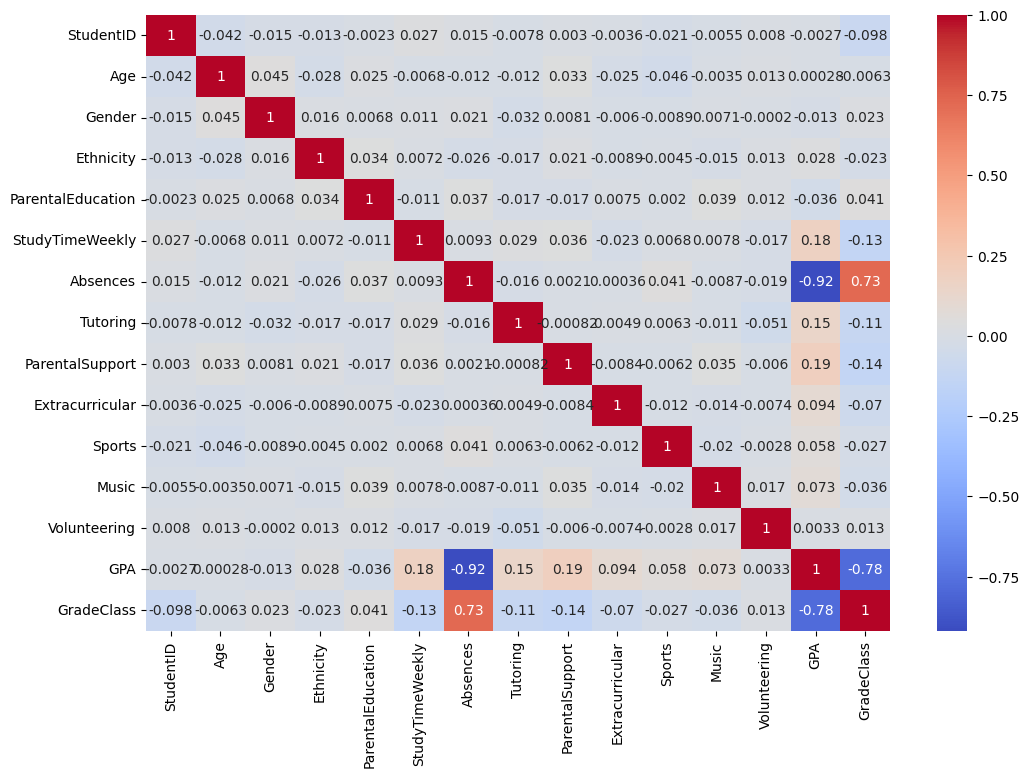

GradeClass           1.000000
GPA                  0.782835
Absences             0.728633
ParentalSupport      0.136823
StudyTimeWeekly      0.134131
Tutoring             0.111695
StudentID            0.098500
Extracurricular      0.069733
ParentalEducation    0.041031
Music                0.036065
Sports               0.026654
Ethnicity            0.023326
Gender               0.022998
Volunteering         0.013156
Age                  0.006250
Name: GradeClass, dtype: float64


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()

# Vizualization of correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Select features that have high correlation connection with target variable
target_corr = corr_matrix["GradeClass"].abs().sort_values(ascending=False)
print(target_corr)


На основі кореляційного аналізу ми оберемо ознаки, які мають найвищий кореляційний зв'язок з цільовою змінною GradeClass.
Обираємо 5 ознакЖ
1. GPA
2. Absences
3. ParentalSupport
4. Study TimeWeekly
5. Tutoring

In [21]:
# Selected features
selected_features = ["GPA", "Absences", "ParentalSupport", "StudyTimeWeekly", "Tutoring"]

# Separation of features and target variable
X = df[selected_features]
y = df['GradeClass']